In [3]:
import pandas as pd 
import gurobipy as gp
from gurobipy import GRB
import json 
import matplotlib.pyplot as plt 
from day_ahead_opt_engine import BoilerScheduler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
with open('boiler_model_params.json', 'r') as file:
    boiler_model_params = json.load(file)

In [5]:
market_data = pd.read_parquet("../data/afrr_price.parquet")
boiler_data = pd.read_parquet("../data/boiler_data.parquet").set_index("UTC")

In [6]:
down_cap_price = market_data.iloc[2:26, market_data.columns.get_indexer(['aFRR_DownCapPriceEUR'])].values.flatten()
up_cap_price = market_data.iloc[2:26, market_data.columns.get_indexer(['aFRR_UpCapPriceEUR'])].values.flatten()
da_price = market_data.iloc[2:26, market_data.columns.get_indexer(['da_price'])].values.flatten()
heat_demand = boiler_data.iloc[0:24*4, market_data.columns.get_indexer(['Heat load forecast [MW]'])].values.flatten()

In [7]:
optimizer = BoilerScheduler(boiler_model_params=boiler_model_params,
                            max_power=10.0,
                            min_power=0.0,
                            max_storage=12.0,
                            min_storage=0.0,
                            horizon=96, 
                            lambda_reg=1.0)

In [8]:
power_schedule, storage_schedule = optimizer.step(horizon=96,
                                                  heat_demand=heat_demand,
                                                  da_price=da_price)

Restricted license - for non-production use only - expires 2026-11-23


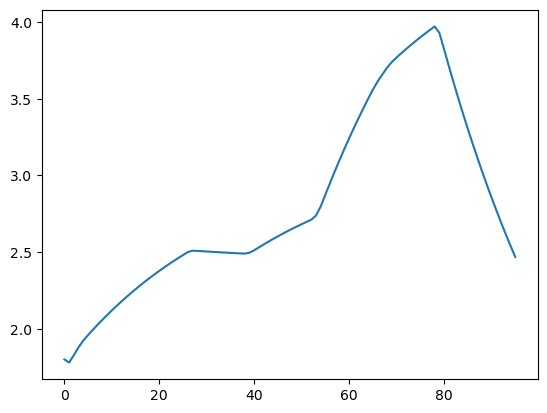

In [9]:
plt.plot(storage_schedule)